In [319]:
import pandas as pd

In [320]:
df = pd.read_csv('../datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [321]:
df.shape

(1599, 12)

In [322]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [323]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [324]:
df['quality'] = (df['quality'] >= 6).astype(int)

In [325]:
df.groupby('quality') ['quality'].count()

quality
0    744
1    855
Name: quality, dtype: int64

In [326]:
x = df.iloc[:,:-1].values
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]],
      shape=(1599, 11))

In [327]:
y = df.iloc[:,-1].values
y

array([0, 0, 0, ..., 1, 0, 1], shape=(1599,))

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [330]:
x_train.shape

(1119, 11)

In [331]:
x_test.shape

(480, 11)

In [332]:
from sklearn.preprocessing import StandardScaler

In [333]:
scaler = StandardScaler()

In [334]:
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [335]:
x_train = scaler.transform(x_train)

In [336]:
x_test = scaler.transform(x_test)

In [337]:
x_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]],
      shape=(1119, 11))

In [338]:
x_test

array([[-0.35581722,  0.14767337, -0.97362431, ..., -0.48256207,
         0.00685171, -0.77159838],
       [-0.29744462, -0.18210512, -0.51304042, ...,  0.49202635,
        -1.03865693, -0.86600234],
       [ 1.39536061,  0.75226727, -0.25716048, ..., -0.22267183,
         1.86553373, -0.48838651],
       ...,
       [-0.93954316, -0.40195744, -0.15480851, ...,  0.49202635,
        -0.34165117,  0.17244119],
       [ 1.27861542, -0.12714203,  1.892231  , ..., -1.4571505 ,
         0.00685171,  1.30528867],
       [ 0.92837985, -0.18210512, -0.15480851, ...,  0.16716354,
        -0.80632167, -0.39398255]], shape=(480, 11))

In [339]:
from sklearn.neighbors import KNeighborsClassifier

In [340]:
model = KNeighborsClassifier(n_neighbors=5)

In [341]:
model.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [342]:
y_pred = model.predict(x_test)

In [343]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [344]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [345]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[139,  74],
       [ 58, 209]])

In [346]:
score = accuracy_score(y_test,y_pred)
score

0.725

In [347]:
cmd = ConfusionMatrixDisplay(cm)

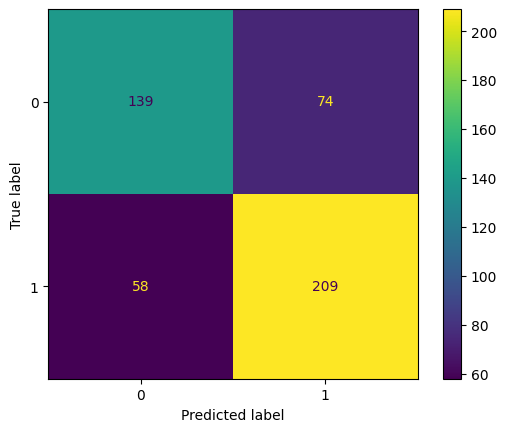

In [348]:
cmd.plot()

In [349]:
for k in range(1, 31):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    print(k, model.score(x_test, y_test))

1 0.7541666666666667
2 0.7229166666666667
3 0.7166666666666667
4 0.7020833333333333
5 0.725
6 0.7020833333333333
7 0.6958333333333333
8 0.7166666666666667
9 0.71875
10 0.7125
11 0.7125
12 0.7104166666666667
13 0.71875
14 0.71875
15 0.70625
16 0.7104166666666667
17 0.7208333333333333
18 0.7083333333333334
19 0.7104166666666667
20 0.7041666666666667
21 0.70625
22 0.7104166666666667
23 0.7083333333333334
24 0.7145833333333333
25 0.7145833333333333
26 0.7145833333333333
27 0.6979166666666666
28 0.69375
29 0.7020833333333333
30 0.7020833333333333
